In [1]:
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 5.1 MB/s 


In [29]:
import numpy as np
import matplotlib.pyplot as plt 

### Download Haxby Dataset


In [3]:
from nilearn import datasets 

In [4]:
haxby_dataset = datasets.fetch_haxby(data_dir ='/content/', subjects=1 , fetch_stimuli= False) 


Dataset created in /content/haxby2001



 ...done. (0 seconds, 0 min)
 ...done. (0 seconds, 0 min)


Downloaded 290824192 of 314803244 bytes (92.4%,    0.3s remaining) ...done. (4 seconds, 0 min)
Extracting data from /content/haxby2001/b7061e6dfd4459484ab7c3872d37e765/subj1-2010.01.14.tar.gz..... done.


In [18]:
from nilearn.image import load_img
img = load_img(haxby_dataset.func[0])
data = img.get_fdata()
data.shape

(40, 64, 64, 1452)

We can think of the shape of the data as two parts - the first 3 values are the 3D shape of the individual volumes, and the last value is the timestamp.

In [19]:
n_vols = data.shape[-1]
N = np.prod(data.shape[:-1])


In [20]:
data_to_pca  = data.reshape(N, n_vols).T
data_to_pca.shape

(1452, 163840)

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=20)
pca.fit(data_to_pca)

PCA(n_components=20)

In [44]:
components = pca.transform(data_to_pca)

In [45]:
components.shape

(1452, 20)

Text(0, 0.5, 'Ratio')

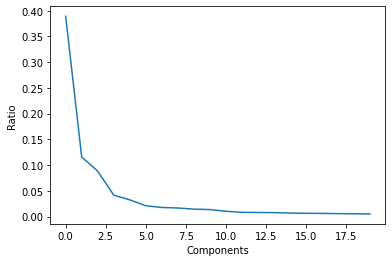

In [43]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Components')
plt.ylabel('Ratio')

In [46]:
filtered = pca.inverse_transform(components)



In [62]:
bold_pca =  filtered.reshape(n_vols,data.shape[:-1][0],data.shape[:-1][1],data.shape[:-1][2]  )
bold_pca.shape

(1452, 40, 64, 64)

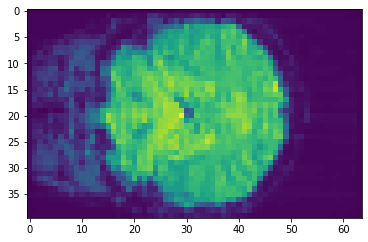

In [67]:
plt.imshow(bold_pca[2,:,25,:])